/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8645 - loss: 0.4367 - val_accuracy: 0.9836 - val_loss: 0.0499
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9861 - val_loss: 0.0443
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9878 - val_loss: 0.0379
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9918 - loss: 0.0251 - val_accuracy: 0.9893 - val_loss: 0.0334
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9893 - val_loss: 0.0313
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0419
Test accuracy:, {test_acc * 100:.2f}%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Prediction for the first test image: 7


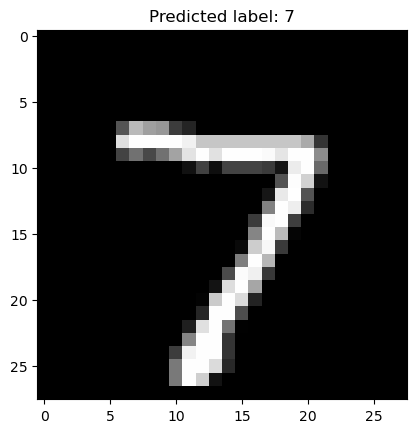

In [1]:
# Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing: Normalize the pixel values to be between 0 and 1
train_images = train_images /255.0
test_images = test_images / 255.0

# Reshape the images to be 28x28 pixels as they are grayscale
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert the labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Secon convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D and add a Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each digit)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:, {test_acc * 100:.2f}%')

# Make predictions on test images
predictions = model.predict(test_images)
print(f"Prediction for the first test image: {np.argmax(predictions[0])}")

plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted label: {predictions[0]. argmax()}")
plt.show()